In [1]:
import pandas as pd

# Cargar los datos
df_demo = pd.read_csv('df_final_demo.csv')
df_web_pt1 = pd.read_csv('df_final_web_data_pt_1.csv')
df_web_pt2 = pd.read_csv('df_final_web_data_pt_2.csv')
df_experiment = pd.read_csv('df_final_experiment_clients.csv')

# Mostrar las primeras filas de cada dataset
display(df_demo.head())
display(df_web_pt1.head())
display(df_web_pt2.head())
display(df_experiment.head())

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58


,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [2]:
# Resumen estadístico
print(df_demo.describe())
print(df_web_pt1.describe())
print(df_web_pt2.describe())
print(df_experiment.describe())

# Tipos de datos y valores nulos
print(df_demo.info())
print(df_web_pt1.info())
print(df_web_pt2.info())
print(df_experiment.info())


          client_id  clnt_tenure_yr  clnt_tenure_mnth      clnt_age  \
count  7.060900e+04    70595.000000      70595.000000  70594.000000   
mean   5.004992e+06       12.052950        150.659367     46.442240   
std    2.877278e+06        6.871819         82.089854     15.591273   
min    1.690000e+02        2.000000         33.000000     13.500000   
25%    2.519329e+06        6.000000         82.000000     32.500000   
50%    5.016978e+06       11.000000        136.000000     47.000000   
75%    7.483085e+06       16.000000        192.000000     59.000000   
max    9.999839e+06       62.000000        749.000000     96.000000   

          num_accts           bal  calls_6_mnth  logons_6_mnth  
count  70595.000000  7.059500e+04  70595.000000   70595.000000  
mean       2.255528  1.474452e+05      3.382478       5.566740  
std        0.534997  3.015087e+05      2.236580       2.353286  
min        1.000000  1.378942e+04      0.000000       1.000000  
25%        2.000000  3.734683e+04  

In [3]:
# Duplicados
print(f"Duplicados en df_demo: {df_demo.duplicated().sum()}")
print(f"Duplicados en df_web_pt1: {df_web_pt1.duplicated().sum()}")
print(f"Duplicados en df_web_pt2: {df_web_pt2.duplicated().sum()}")
print(f"Duplicados en df_experiment: {df_experiment.duplicated().sum()}")

# Valores nulos
print(df_demo.isnull().sum())
print(df_web_pt1.isnull().sum())
print(df_web_pt2.isnull().sum())
print(df_experiment.isnull().sum())


Duplicados en df_demo: 0
Duplicados en df_web_pt1: 2095
Duplicados en df_web_pt2: 8669
Duplicados en df_experiment: 0
client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64
client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64
client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64
client_id        0
Variation    20109
dtype: int64


In [12]:
#Unión de los Conjuntos de Datos Web
df_web_combined = pd.concat([df_web_pt1, df_web_pt2], ignore_index=True)
display(df_web_combined.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755405 entries, 0 to 755404
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     755405 non-null  int64 
 1   visitor_id    755405 non-null  object
 2   visit_id      755405 non-null  object
 3   process_step  755405 non-null  object
 4   date_time     755405 non-null  object
dtypes: int64(1), object(4)
memory usage: 28.8+ MB


None

c:\Users\danny\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


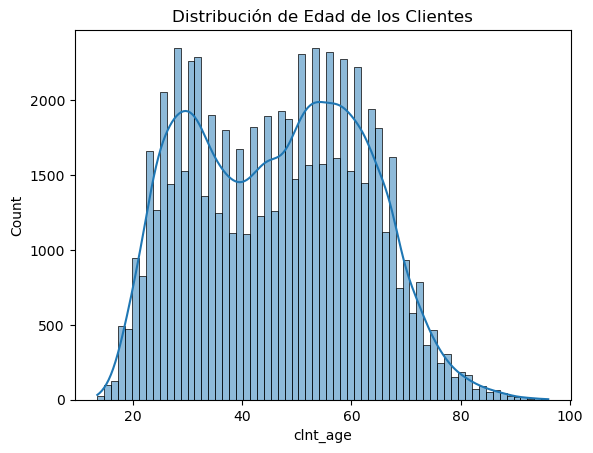

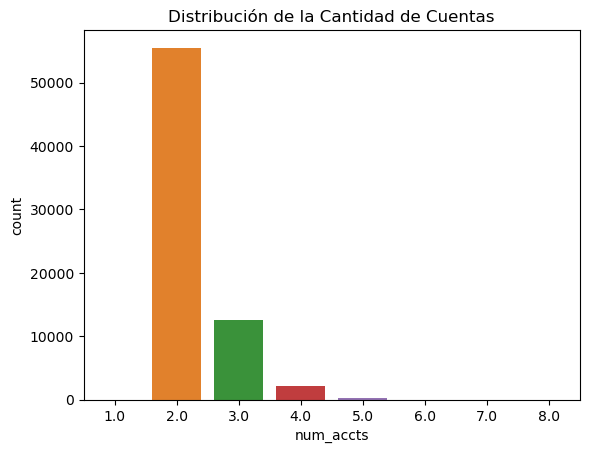

c:\Users\danny\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


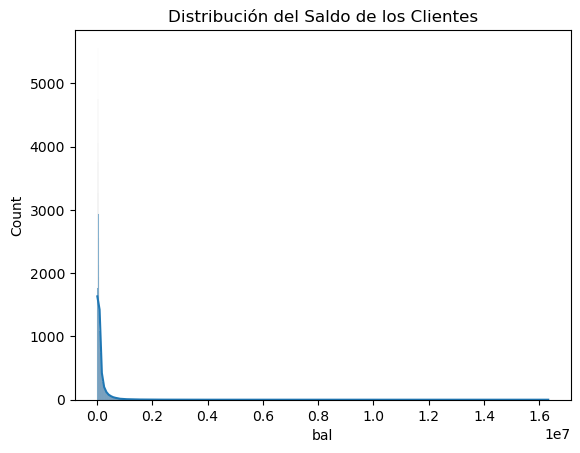

In [10]:
# 5. Exploración Específica por Columnas
import matplotlib.pyplot as plt
import seaborn as sns

# Distribución de la edad
sns.histplot(df_demo['clnt_age'], kde=True)
plt.title('Distribución de Edad de los Clientes')
plt.show()

# Distribución del número de cuentas
sns.countplot(x='num_accts', data=df_demo)
plt.title('Distribución de la Cantidad de Cuentas')
plt.show()

# Distribución del saldo
sns.histplot(df_demo['bal'], kde=True)
plt.title('Distribución del Saldo de los Clientes')
plt.show()


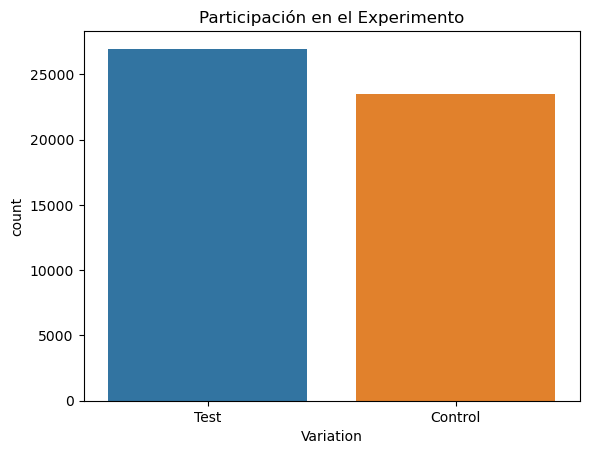

In [16]:
# 6. Análisis de Participación en el Experimento
sns.countplot(x='Variation', data=df_experiment)
plt.title('Participación en el Experimento')
plt.show()


In [ ]:
# 7. Limpieza de Datos
# Eliminar duplicados

df_web_combined = df_web_combined.drop_duplicates()
df_experiment = df_experiment.drop_duplicates()

# Manejo de valores nulos (ejemplo: eliminar filas con muchos nulos)
df_demo = df_demo.dropna(thresh=int(0.7 * len(df_demo.columns)))
df_web_combined = df_web_combined.dropna(thresh=int(0.7 * len(df_web_combined.columns)))
df_experiment = df_experiment.dropna(thresh=int(0.7 * len(df_experiment.columns)))


In [ ]:
#df demo
df_demo = df_demo.drop_duplicates()

In [17]:
# Eliminar duplicados en los conjuntos web
df_web_pt1 = df_web_pt1.drop_duplicates()
df_web_pt2 = df_web_pt2.drop_duplicates()

# Unir los dos DataFrames de web después de la eliminación
df_web_combined = pd.concat([df_web_pt1, df_web_pt2], ignore_index=True)


2. Valores Nulos
En df_demo:
Valores nulos en columnas:
Hay 14 valores nulos en varias columnas (clnt_tenure_yr, clnt_tenure_mnth, gendr, num_accts, bal, calls_6_mnth, logons_6_mnth).
Hay 15 valores nulos en clnt_age.
Para tratar estos nulos, podemos optar por:


In [7]:
df_demo.shape

(70609, 9)

In [8]:
#Eliminar filas con valores nulos, si el impacto es bajo:
df_demo = df_demo.dropna()
#Para valores numéricos (clnt_age, bal, etc.), puedes usar la media, mediana o un valor representativo:
# Para la columna 'clnt_age'
df_demo['clnt_age'] = df_demo['clnt_age'].fillna(df_demo['clnt_age'].median())

# Para la columna 'bal'
df_demo['bal'] = df_demo['bal'].fillna(df_demo['bal'].mean())

# Para la columna 'gendr' variable categórica
df_demo['gendr'] = df_demo['gendr'].fillna(df_demo['gendr'].mode()[0])

display(df_demo)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [9]:

df_demo.shape

(70594, 9)

In [20]:
# Verificar si aún quedan valores nulos
print(df_demo.isnull().sum())

client_id           0
clnt_tenure_yr      0
clnt_tenure_mnth    0
clnt_age            0
gendr               0
num_accts           0
bal                 0
calls_6_mnth        0
logons_6_mnth       0
dtype: int64


In [22]:
# En df_experiment:
# La columna variation tiene 20,109 valores nulos. Esto es un porcentaje considerable de datos, por lo que podemos explorar:
# Eliminar filas donde variation sea nulo (si es un subconjunto del que no se puede obtener información útil):
df_experiment = df_experiment.dropna(subset=['Variation'])
print(df_experiment.isnull().sum())

client_id    0
Variation    0
dtype: int64
